In [ ]:

#DESKRIPSI : ANALISIS DAN VISUALISASI DATA VAKSINASI COVID-19 DI SELURUH NEGARA DI DUNIA
#KAMUS
#vaccinations_df = list

#ALGORITMA :

#INISIALISASI
import pandas as pd
import matplotlib.pyplot as plt
import math as m

from google.colab import drive
drive.mount('/content/drive')

vaccinations_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_vaccinations.csv')

#Menunjukkan Data
vaccinations_df

date = vaccinations_df.date.str.split('-', expand=True)

# We are adding new columns for year, month and day.
vaccinations_df['year'] = date[0]
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]

# Changing all to numbers.
vaccinations_df.year = pd.to_numeric(vaccinations_df.year)
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)
# putting new value into date.
vaccinations_df.date = pd.to_datetime(vaccinations_df.date)

vaccinations_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


**TUGAS 08 : DATA CLEANSING**

In [ ]:
#Terdapat Data yang memiliki nilai bersifat "NaN" atau non available, dampaknya memang tidak terlalu berpengaruh namun alangkah baiknya mengubah sifat NaN menjadi Angka bernilai 0 (dianggap kosong)
vaccinations_df.fillna(value=0, inplace=True)
vaccinations_df


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,11
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,12
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,13
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,14


**TUGAS 03 : DESKRIPSI DATA DAN FILE**

In [ ]:
#Menjelaskan Bentuk Data
print("Data Berupa Format CSV dengan berjudul 'country_vaccinations.csv' ")
print("Data berupa informasi jumlah populasi di dunia yang divaksinasi virus COVID-19")
print("Data Diambil melaluli web yang bersumber dari 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' ")
print("Data berukuran 6,026 KB")
print(f"Data Diambil dimulai dari : {vaccinations_df['date'].min()}")
print(f"Data Diambil terakhir pada : {vaccinations_df['date'].max()}")

Data Berupa Format CSV dengan berjudul 'country_vaccinations.csv' 
Data berupa informasi jumlah populasi di dunia yang divaksinasi virus COVID-19
Data Diambil melaluli web yang bersumber dari 'https://www.kaggle.com/gpreda/covid-world-vaccination-progress' 
Data berukuran 6,026 KB
Data Diambil dimulai dari : 2020-12-02 00:00:00
Data Diambil terakhir pada : 2021-07-18 00:00:00


In [ ]:
#Menjelaskan Kolom-Kolom Pada Dataset

print("Nama-nama Kolom pada dataset")
kolom = list(vaccinations_df.columns)
for index in range (len(kolom)):
    print(str(index+1) + "." + str(kolom[index]))

Nama-nama Kolom pada dataset
1.country
2.iso_code
3.date
4.total_vaccinations
5.people_vaccinated
6.people_fully_vaccinated
7.daily_vaccinations_raw
8.daily_vaccinations
9.total_vaccinations_per_hundred
10.people_vaccinated_per_hundred
11.people_fully_vaccinated_per_hundred
12.daily_vaccinations_per_million
13.vaccines
14.source_name
15.source_website
16.year
17.month
18.day


In [ ]:

#Penjelasan Spesifik Mengenai Kolom-Kolom
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31559 non-null  object        
 1   iso_code                             31559 non-null  object        
 2   date                                 31559 non-null  datetime64[ns]
 3   total_vaccinations                   31559 non-null  float64       
 4   people_vaccinated                    31559 non-null  float64       
 5   people_fully_vaccinated              31559 non-null  float64       
 6   daily_vaccinations_raw               31559 non-null  float64       
 7   daily_vaccinations                   31559 non-null  float64       
 8   total_vaccinations_per_hundred       31559 non-null  float64       
 9   people_vaccinated_per_hundred        31559 non-null  float64       
 10  people_ful

In [ ]:
#Penjelasan Dimensi Mengenai Data

print("Dimensi data: " + str(len(vaccinations_df)) + " baris x " + str(len(vaccinations_df.columns)) + " kolom")

Dimensi data: 31559 baris x 18 kolom


**TUGAS 04 : KARATERISTIK DATA**

In [ ]:
#PENJELASAN KOLOM 1 (Country)

dfnull = vaccinations_df.isnull().sum()

print("1. country (nama negara yang tercatat)")
print("Country adalah tipe data kategorikal nominal dengan kategori sebagai berikut:" + str(list(vaccinations_df["country"].unique())))
print("Jumlah data kosong: " + str(dfnull["country"]))

1. country (nama negara yang tercatat)
Country adalah tipe data kategorikal nominal dengan kategori sebagai berikut:['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faeroe Is

In [ ]:
#PENJELASAN KOLOM 2 (ISO_CODE (KODE TIGA HURUF NEGARA))

print("2. iso_code (kode tiga huruf tiap negara yang tercatat pada data)")
print("ISO code adalah tipe data kategorikal nominal dengan kategori sebagai berikut:" + str(list(vaccinations_df["iso_code"].unique())))
print("Jumlah data kosong: " + str(dfnull["iso_code"]))

2. iso_code (kode tiga huruf tiap negara yang tercatat pada data)
ISO code adalah tipe data kategorikal nominal dengan kategori sebagai berikut:['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'OWID_ENG', 'GNQ', 'EST', 'SWZ', 'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV'

In [ ]:
#PENJELASAN KOLOM 3 (DATE) # YEAR,MONTH, DAN DATE DISATUKAN

print("3. date (data yang tercatat per tanggal tersebut)")
print("Date adalah tipe data kategorikal kontinu dengan kategori sebagai berikut:" + str(list(vaccinations_df["date"].unique())))
print("Jumlah data kosong: " + str(dfnull["date"]))

3. date (data yang tercatat per tanggal tersebut)
Date adalah tipe data kategorikal kontinu dengan kategori sebagai berikut:[numpy.datetime64('2021-02-22T00:00:00.000000000'), numpy.datetime64('2021-02-23T00:00:00.000000000'), numpy.datetime64('2021-02-24T00:00:00.000000000'), numpy.datetime64('2021-02-25T00:00:00.000000000'), numpy.datetime64('2021-02-26T00:00:00.000000000'), numpy.datetime64('2021-02-27T00:00:00.000000000'), numpy.datetime64('2021-02-28T00:00:00.000000000'), numpy.datetime64('2021-03-01T00:00:00.000000000'), numpy.datetime64('2021-03-02T00:00:00.000000000'), numpy.datetime64('2021-03-03T00:00:00.000000000'), numpy.datetime64('2021-03-04T00:00:00.000000000'), numpy.datetime64('2021-03-05T00:00:00.000000000'), numpy.datetime64('2021-03-06T00:00:00.000000000'), numpy.datetime64('2021-03-07T00:00:00.000000000'), numpy.datetime64('2021-03-08T00:00:00.000000000'), numpy.datetime64('2021-03-09T00:00:00.000000000'), numpy.datetime64('2021-03-10T00:00:00.000000000'), numpy.da

In [ ]:
#PENJELASAN KOLOM 4 (TOTAL VAKSINASI YANG DIBERIKAN DISELURUH NEGARA)

print("4. total_vaccinations (total vaksinasi yang diberikan)")
print("Range: " + str(vaccinations_df["total_vaccinations"].min()) + "-" + str(vaccinations_df["total_vaccinations"].max()))
print("Jumlah data kosong: " + str(dfnull["total_vaccinations"]))

4. total_vaccinations (total vaksinasi yang diberikan)
Range: 0.0-1456557000.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 5 (ORANG YANG SUDAH DIBERIKAN DISELURUH NEGARA)

print("5. people_vaccinated (data orang yang sudah mendapatkan vaksinasi)")
print("Range: " + str(vaccinations_df["people_vaccinated"].min()) + "-" + str(vaccinations_df["people_vaccinated"].max()))
print("Jumlah data kosong: " + str(dfnull["people_vaccinated"]))

5. people_vaccinated (data orang yang sudah mendapatkan vaksinasi)
Range: 0.0-622000000.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 6 (ORANG YANG SUDAH DIBERIKAN SECARA PENUH DISELURUH NEGARA)

print("6. people_fully_vaccinated (data orang yang sudah mendapatkan vaksin secara penuh)")
print("Range: " + str(vaccinations_df["people_fully_vaccinated"].min()) + "-" + str(vaccinations_df["people_fully_vaccinated"].max()))
print("Jumlah data kosong: " + str(dfnull["people_fully_vaccinated"]))

6. people_fully_vaccinated (data orang yang sudah mendapatkan vaksin secara penuh)
Range: 0.0-223299000.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 7 (DATA VAKSINASI HARIAN YANG MASIH MENTAH (YANG DIBERIKAN SECARA PENUH DAN TIDAK MASIH TERCAMPUR))

print("7. daily_vaccinations_raw (raw data vaksinasi harian yang sudah diberikan)")
print("Range: " + str(vaccinations_df["daily_vaccinations_raw"].min()) + "-" + str(vaccinations_df["daily_vaccinations_raw"].max()))
print("Jumlah data kosong: " + str(dfnull["daily_vaccinations_raw"]))

7. daily_vaccinations_raw (raw data vaksinasi harian yang sudah diberikan)
Range: 0.0-24741000.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 8 (ORANG YANG SUDAH DIBERIKAN SECARA PENUH DISELURUH NEGARA)

print("8. daily_vaccinations (data vaksinasi harian yang sudah diberikan)")
print("Range: " + str(vaccinations_df["daily_vaccinations"].min()) + "-" + str(vaccinations_df["daily_vaccinations"].max()))
print("Jumlah data kosong: " + str(dfnull["total_vaccinations"]))

8. daily_vaccinations (data vaksinasi harian yang sudah diberikan)
Range: 0.0-22424286.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 9 (PERSENTASE TOTAL VAKSINASI YANG SUDAH DIBERIKAN)

print("9. total_vaccinations_per_hundred (data orang yang sudah mendapatkan vaksin per seratus)")
print("Range: " + str(vaccinations_df["total_vaccinations_per_hundred"].min()) + "-" + str(vaccinations_df["total_vaccinations_per_hundred"].max()))
print("Jumlah data kosong: " + str(dfnull["total_vaccinations_per_hundred"]))

9. total_vaccinations_per_hundred (data orang yang sudah mendapatkan vaksin per seratus)
Range: 0.0-232.35
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 10 (PERSENTASE ORANG YANG SUDAH MENDAPATKAN VAKSINASI )

print("10. people_vaccinated_per_hundred (data orang yang sudah mendapatkan vaksinasi per seratus)")
print("Range: " + str(vaccinations_df["people_vaccinated_per_hundred"].min()) + "-" + str(vaccinations_df["people_vaccinated_per_hundred"].max()))
print("Jumlah data kosong: " + str(dfnull["people_vaccinated_per_hundred"]))

10. people_vaccinated_per_hundred (data orang yang sudah mendapatkan vaksinasi per seratus)
Range: 0.0-116.66
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 11 (PERSENTASE ORANG YANG SUDAH MENDAPATKAN VAKSINASI SECARA PENUH )

print("11. people_fully_vaccinated_per_hundred (data orang yang sudah mendapatkan vaksinasi secara penuh per seratus)")
print("Range: " + str(vaccinations_df["people_fully_vaccinated_per_hundred"].min()) + "-" + str(vaccinations_df["people_fully_vaccinated_per_hundred"].max()))
print("Jumlah data kosong: " + str(dfnull["people_fully_vaccinated_per_hundred"]))

11. people_fully_vaccinated_per_hundred (data orang yang sudah mendapatkan vaksinasi secara penuh per seratus)
Range: 0.0-115.69
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 12 (DATA VAKSINASI PER JUTA (Populasi di Negara Tersebut))

print("12. daily_vaccinations_per_million (data vaksinasi harian per juta)")
print("Range: " + str(vaccinations_df["daily_vaccinations_per_million"].min()) + "-" + str(vaccinations_df["daily_vaccinations_per_million"].max()))
print("Jumlah data kosong: " + str(dfnull["daily_vaccinations_per_million"]))

12. daily_vaccinations_per_million (data vaksinasi harian per juta)
Range: 0.0-118759.0
Jumlah data kosong: 0


In [ ]:
#PENJELASAN KOLOM 13 (TIPE VAKSIN YANG DIPAKAI)

print("13. vaccines (tipe vaksin apa saja yang dipakai)")
print("Vaccines adalah tipe data kategorikal nominal dengan kategori sebagai berikut:" + str(list(vaccinations_df["vaccines"].unique())))
print("Jumlah data kosong: " + str(dfnull["vaccines"]))

13. vaccines (tipe vaksin apa saja yang dipakai)
Vaccines adalah tipe data kategorikal nominal dengan kategori sebagai berikut:['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing', 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V', 'Oxford/AstraZeneca, Sputnik V', 'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca', 'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V', 'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech', 'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V', 'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing', 'Sinopharm/Beijing, Sputnik V', 'Oxford/AstraZeneca, Sinopharm/Beijing', 'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech', 'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac', 'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac', 'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech', 'Covaxin, Oxford/AstraZeneca', 'Sinopharm/Be

In [ ]:
#PENJELASAN KOLOM 14 (RUJUKAN SUMBER DATA)

print("14. source_name (sumber data yang dijadikan rujukan)")
print("Source name adalah tipe data kategorikal nominal dengan kategori sebagai berikut:" + str(list(vaccinations_df["source_name"].unique())))
print("Jumlah data kosong: " + str(dfnull["source_name"]))

14. source_name (sumber data yang dijadikan rujukan)
Source name adalah tipe data kategorikal nominal dengan kategori sebagai berikut:['World Health Organization', 'Ministry of Health', 'Government of Andorra', 'Government of Aruba', 'Government of Australia via covidlive.com.au', 'Government of Azerbaijan', 'Pan American Health Organization', 'Directorate General of Health Services', 'Sciensano', 'Public Health Institute', 'Ministry of Health and Wellness', 'Official data from provinces via covid19tracker.ca', 'Cayman Islands Government', 'Africa Centres for Disease Control and Prevention', 'Ministerio de Ciencia, Tecnología, Conocimiento e Innovación', 'National Health Commission', 'SPC Public Health Division', 'Costa Rican Social Security Fund', 'Ministry of Health and Public Hygiene', 'Government of Curacao', 'Statens Serum Institute', 'Ministry of Public Health', 'Government of Ecuador via Ecuacovid', 'Government of the United Kingdom', 'National Health Board', 'Government of Eswa

In [ ]:
#PENJELASAN KOLOM 15 (RUJUKAN WEBSITE YANG DIJADIKAN SUMBER DATA )

print("15. source_website (web yang dijadikan rujukan)")
print("Source website adalah tipe data kategorikal nominal dengan kategori sebagai berikut:" + str(list(vaccinations_df["source_website"].unique())))
print("Jumlah data kosong: " + str(dfnull["source_website"]))

15. source_website (web yang dijadikan rujukan)
Source website adalah tipe data kategorikal nominal dengan kategori sebagai berikut:['https://covid19.who.int/', 'https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-1067135-vaksinime/', 'https://english.aawsat.com/home/article/3013471/muslim-brotherhood-parties-hope-sweep-algeria-elections', 'https://www.govern.ad/covid19_newsletter/', 'https://covid19.gov.ag', 'http://datos.salud.gob.ar/dataset/vacunas-contra-covid-19-dosis-aplicadas-en-la-republica-argentina', 'https://www.government.aw', 'https://covidlive.com.au/vaccinations', 'https://info.gesundheitsministerium.gv.at/opendata/', 'https://koronavirusinfo.az', 'https://www.facebook.com/opmbs/photos/a.345763129479004/849088879146424/', 'https://healthalert.gov.bh/en/', 'http://103.247.238.92/webportal/pages/covid19-vaccination-update.php', 'https://www.facebook.com/moh.barbados/photos/a.768944336470972/4380712441960792/', 'https://epistat.wiv-isp.be/covid/', 'https://www.facebook.co

In [ ]:
#KESIMPULAN DATA YANG KOSONG
vaccinations_df.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
year                                   0
month                                  0
day                                    0
dtype: int64

**TUGAS 05 : STATISTIK DATA**

In [ ]:
vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,3.155900e+04,3.155900e+04,3.155900e+04,3.155900e+04,3.155900e+04,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000
mean,6.945036e+06,3.104014e+06,1.499429e+06,1.063135e+05,1.154348e+05,16.648548,10.334407,5.586328,3425.327514,2020.986597,4.431414,15.441617
std,5.183410e+07,1.594782e+07,8.536612e+06,8.651520e+05,8.451027e+05,30.302049,18.042005,12.383420,4563.632793,0.114997,1.893425,8.765697
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+02,0.000000,0.000000,0.000000,399.000000,2021.000000,3.000000,8.000000
50%,2.774900e+04,1.048000e+04,0.000000e+00,0.000000e+00,6.352000e+03,0.700000,0.250000,0.000000,1841.000000,2021.000000,5.000000,15.000000
75%,1.254232e+06,7.827445e+05,2.491715e+05,1.725450e+04,3.566150e+04,19.130000,12.415000,4.170000,5143.000000,2021.000000,6.000000,23.000000
max,1.456557e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000,2021.000000,12.000000,31.000000


In [ ]:
vaccinations_df.vaccines.value_counts()

Oxford/AstraZeneca                                                                             4673
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                  4161
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                                   2609
Oxford/AstraZeneca, Sinopharm/Beijing                                                          2259
Oxford/AstraZeneca, Pfizer/BioNTech                                                            2098
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                              1639
Moderna, Pfizer/BioNTech                                                                       1492
Pfizer/BioNTech                                                                                1156
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                                   1076
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V                                         659


In [ ]:
#Jumlah Orang yang sudah di vaksinasi secara penuh
print(f"Jumlah orang yang sudah tervaksinasi secara penuh ada sekitar {vaccinations_df.people_fully_vaccinated.max()} orang atau sekitar 223 Juta Orang")

#Jumlah Vaksinasi Yang Dilakukan
print(f"Jumlah Vaksinasi sekitar {vaccinations_df.total_vaccinations.max()} orang atau 1.4 Milliar Orang")

#Rata-Rata Vaksinasi Yang Dilakukan per harinya
print(f"Rata-Rata Vaksinasi yang dilakukan per harinya sekitar {m.trunc(vaccinations_df.daily_vaccinations_raw.mean())} orang yang divaksinasi")

#Standar Deviasi Rata Rata Vaksinasi Yang Dilakukan (Jika Hanya angka yang ditampilkan memang tidak terlalu bisa dijelaskan)
print(f"Standar Deviasi adalah {m.trunc(vaccinations_df.daily_vaccinations_raw.std())} ")

#Standar Deviasi Total Vaksinasi Yang Dilakukan (Jika Hanya angka yang ditampilkan memang tidak terlalu bisa dijelaskan)
print(f"Standar Deviasi adalah {m.trunc(vaccinations_df.total_vaccinations.std())} ")



Jumlah orang yang sudah tervaksinasi secara penuh ada sekitar 223299000.0 orang atau sekitar 223 Juta Orang
Jumlah Vaksinasi sekitar 1456557000.0 orang atau 1.4 Milliar Orang
Rata-Rata Vaksinasi yang dilakukan per harinya sekitar 106313 orang yang divaksinasi
Standar Deviasi adalah 865151 
Standar Deviasi adalah 51834101 


In [ ]:
#Negara dengan Vaksinasi Penuh Paling Banyak
fully_vaccinated = vaccinations_df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)
fully_vaccinated.reset_index()

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,161232483.0
2,India,83037953.0
3,Germany,38194316.0
4,United Kingdom,35970849.0
5,Brazil,33990366.0
6,England,30107863.0
7,Japan,27411127.0
8,France,27070389.0
9,Italy,26319734.0


In [ ]:
fully_vaccinated_percentile = vaccinations_df.groupby("country")["people_fully_vaccinated_per_hundred"].max().sort_values(ascending= False).head(25)
fully_vaccinated_percentile.reset_index()

,country,people_fully_vaccinated_per_hundred
0,Gibraltar,115.69
1,Malta,80.91
2,Iceland,73.89
3,Cayman Islands,70.54
4,Seychelles,69.29
5,United Arab Emirates,68.10
6,San Marino,67.18
7,Bermuda,65.11
8,Isle of Man,63.61
9,Chile,61.28


In [ ]:
#Jumlah Negara yang Terdata
vaccinations_df.country.nunique()

219

**TUGAS 06 : VISUALISASI DATA**

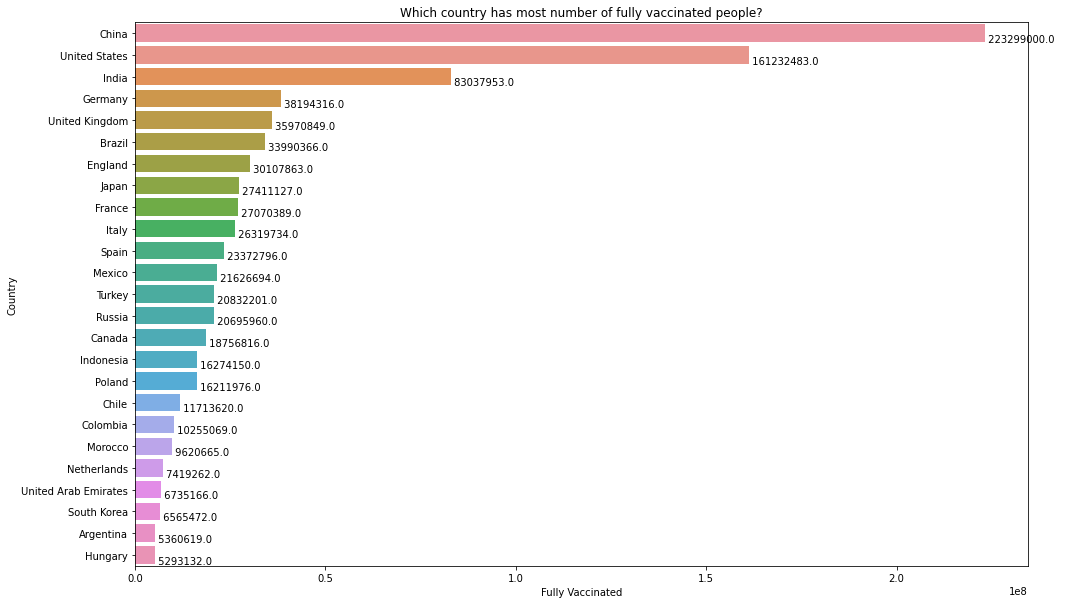

In [ ]:
# 1. Perbandingan Kategori
# title : Orang yang sudah vaksinasi lengkap di tiap negara

fully_vaccinated = vaccinations_df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)
plt.figure(figsize=(16,10))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)

plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

# The concept of patches need to be taught.
for patch in ax.patches:
    width = patch.get_width() # it get's the width of the bar
    height = patch.get_height() # it get's the height of the bar
    x = patch.get_x()# It get's the x coordinate from where the bar starts
    y = patch.get_y()# It get's the y coordinate from where the bar starts

    plt.text(width + x, height + y, ' {:.1f} '.format(width))

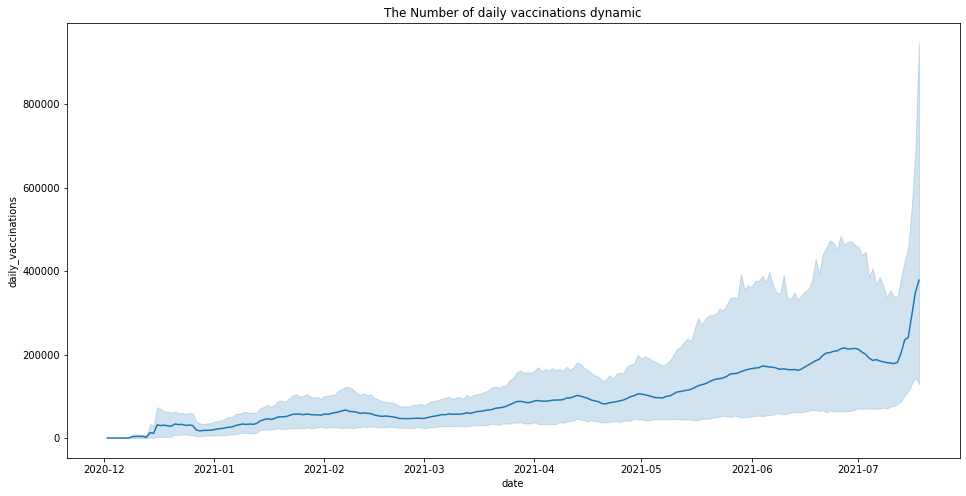

In [ ]:
#Bagaimana Dinamika atau Tingkat Vaksinasi tiap harinya?

plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()



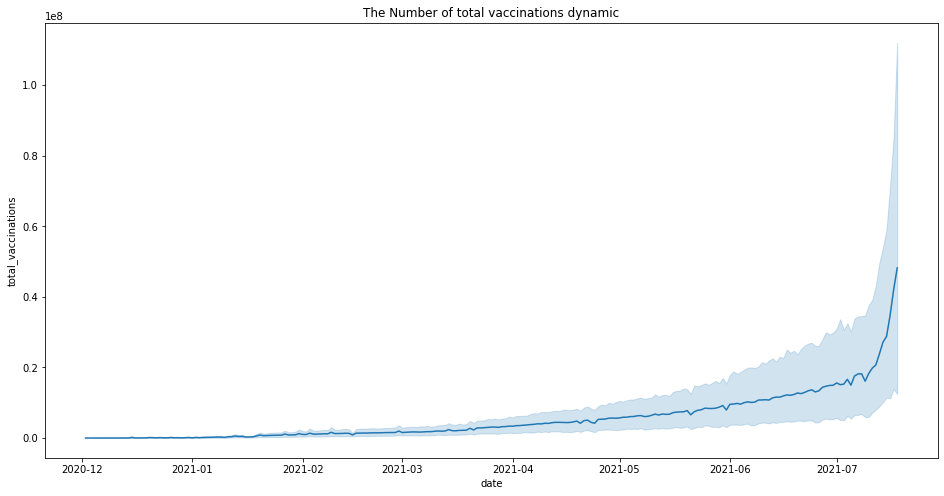

In [ ]:
#Bagaimana Dinamika Total Vaksinasi?

plt.figure(figsize=(16,8))
sns.lineplot(x=vaccinations_df.date, y=vaccinations_df.total_vaccinations)
plt.title('The Number of total vaccinations dynamic')
plt.show()



Index(['China', 'India', 'United States', 'Brazil', 'Germany'], dtype='object', name='country')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


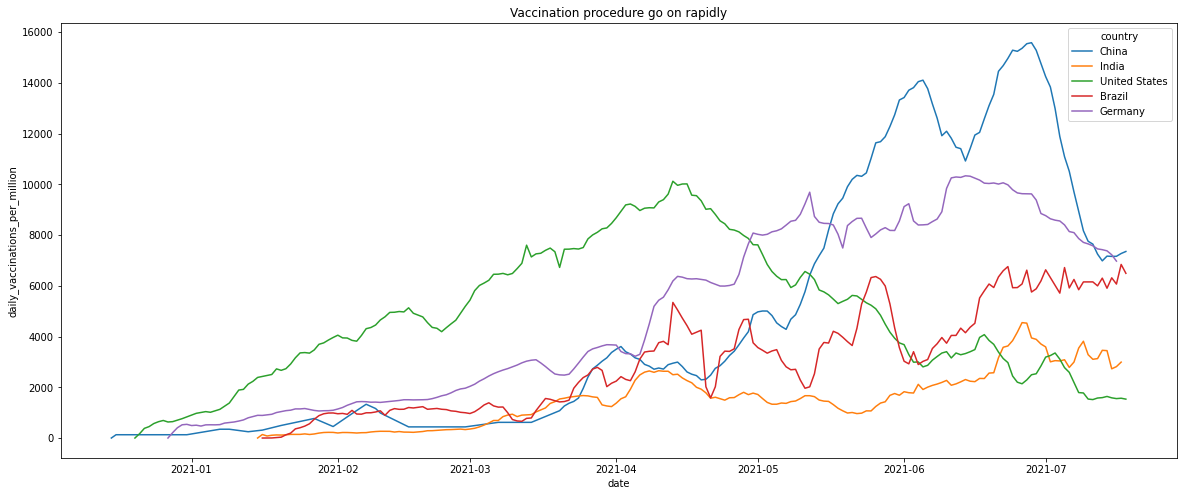

In [ ]:
# 1. Perbandingan Kategori
# title : Top 5 Negara Pemberian Vaksinasi

countries = vaccinations_df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index # We groupped it on basis of country according to their total vaccinations.
# Then arranged them in descending order.
print(countries)

top_countries = pd.DataFrame(columns= vaccinations_df.columns) # We made dataframe with name of top_countries and imported the name of columns of  vaccination dataframe.

for country in countries: # Now with the help of this new loop we will add the country name in top_countries data_frame.
  top_countries = top_countries.append(vaccinations_df.loc[vaccinations_df['country'] == country])

plt.figure(figsize=(20,8))

sns.lineplot(top_countries['date'],
             top_countries['daily_vaccinations_per_million'],
             hue= top_countries['country'])

plt.title('Vaccination procedure go on rapidly');

<Figure size 1800x720 with 0 Axes>

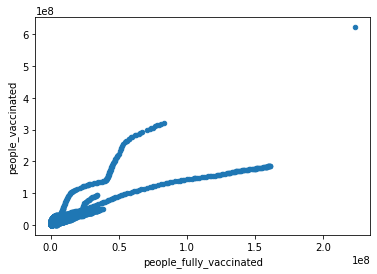

In [ ]:
# 4. Plotting relationship
# people fully vaccinated vs people vaccinated
plt.figure(figsize=(25,10))
vaccinations_df.plot(kind = "scatter", x = "people_fully_vaccinated", y = "people_vaccinated")

<Figure size 1800x720 with 0 Axes>

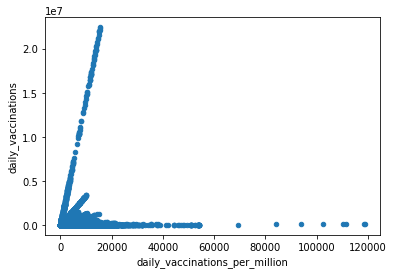

In [ ]:
# 4. Plotting Relationship
# daily vaccinations per million vs daily vaccinations
plt.figure(figsize=(25,10))
vaccinations_df.plot(kind = "scatter", x = "daily_vaccinations_per_million", y = "daily_vaccinations")

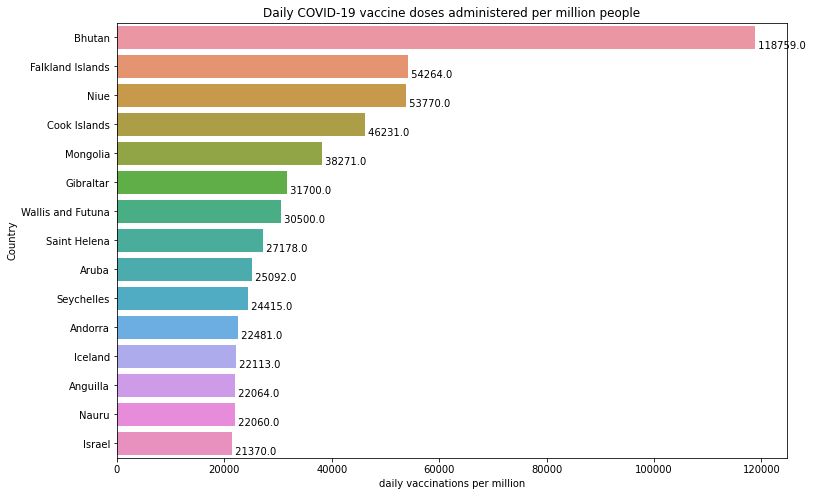

In [ ]:
#Bagaimana Dosis Vaksin ter administrasi per juta orangnya


daily_vaccinations_per_million = vaccinations_df.groupby("country")["daily_vaccinations_per_million"].max().sort_values(ascending= False).head(15)

plt.figure(figsize=(12,8))
ax = sns.barplot(x=daily_vaccinations_per_million, y=daily_vaccinations_per_million.index )
plt.xlabel("daily vaccinations per million")
plt.ylabel("Country")
plt.title("Daily COVID-19 vaccine doses administered per million people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()

    plt.text(width + x, height + y, ' {:.1f} '.format(width))

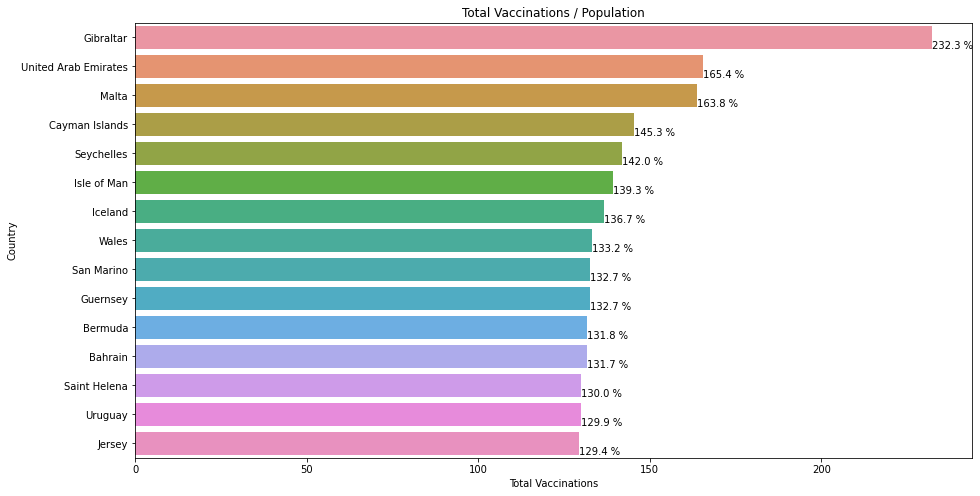

In [ ]:
#Negara mana yang paling banyak di vaksinasi secara penuh
population_country=vaccinations_df.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(15)
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=population_country, y=population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()

    plt.text(width + x, height + y, '{:.1f} %'.format(width))

In [ ]:
#Contoh Analisis Vaksinasi Per BUlan untuk df = vaccinations_df[vaccinations_df['country'] == 'Indonesia']
indonesia_df
months_indonesia = indonesia_df.groupby('month')['daily_vaccinations'].sum()
months_indonesia=months_indonesia.to_frame()
months_indonesia=months_indonesia.rename(columns={"daily_vaccinations":"Monthly_Vaccinations"})
months_indonesia
sns.barplot(x =months_indonesia.index, y =months_indonesia.Monthly_Vaccinations)
plt.savefig("analisisvak.png")

NameError: ignored

**TUGAS 07 : KORELASI DATA**

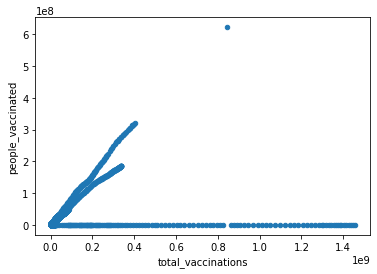

In [ ]:
# Relasi antara total vaccinations dengan people vaccinated
vaccinations_df.plot(kind="scatter", x="total_vaccinations", y="people_vaccinated")

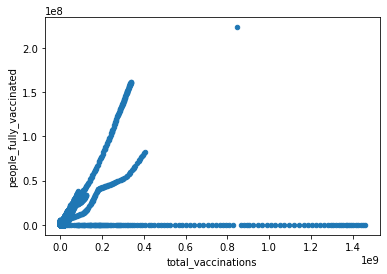

In [ ]:
# Relasi antara total vaccinations dengan people fully vaccinated
vaccinations_df.plot(kind="scatter", x="total_vaccinations", y="people_fully_vaccinated")

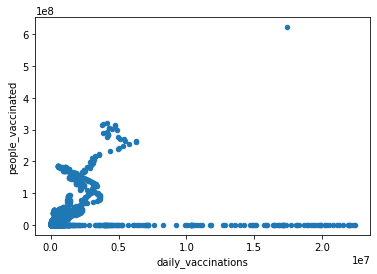

In [ ]:
# Relasi antara daily vaccinations dengan people vaccinated
vaccinations_df.plot(kind="scatter", x="daily_vaccinations", y="people_vaccinated")

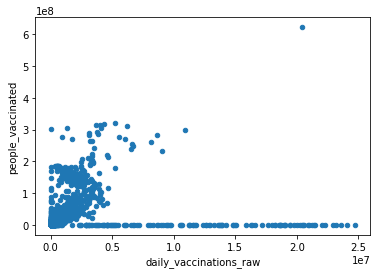

In [ ]:
# Relasi antara daily vaccinations raw dengan people vaccinated
vaccinations_df.plot(kind="scatter", x="daily_vaccinations_raw", y="people_vaccinated")

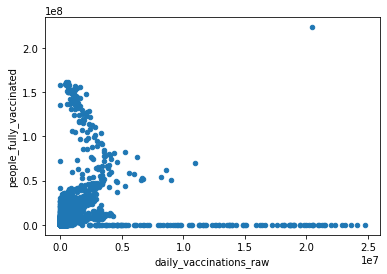

In [ ]:
# Relasi antara daily vaccinations raw dengan people fully vaccinated
vaccinations_df.plot(kind="scatter", x="daily_vaccinations_raw", y="people_fully_vaccinated")

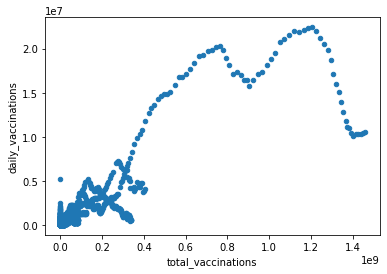

In [ ]:
# Relasi antara total vaccinations dengan daily vaccinations
vaccinations_df.plot(kind="scatter", x="total_vaccinations", y="daily_vaccinations")

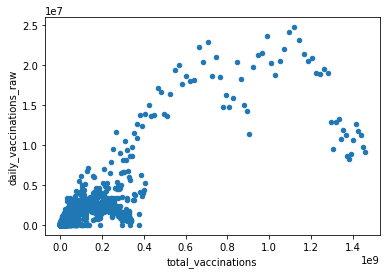

In [ ]:
# Relasi antara total vaccinations dengan daily vaccinations raw
vaccinations_df.plot(kind="scatter", x="total_vaccinations", y="daily_vaccinations_raw")

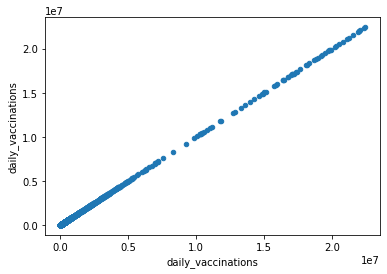

In [ ]:
# Relasi antara daily vaccinations dengan daily vaccinations
vaccinations_df.plot(kind="scatter", x="daily_vaccinations", y="daily_vaccinations")

In [ ]:
# Koefisien korelasi atribut kuantitatif
vaccinations_df.loc[:,["total_vaccinations","daily_vaccinations","daily_vaccinations_raw","people_vaccinated","people_fully_vaccinated"]].corr()

,total_vaccinations,daily_vaccinations,daily_vaccinations_raw,people_vaccinated,people_fully_vaccinated
total_vaccinations,1.000000,0.889306,0.856959,0.436316,0.416013
daily_vaccinations,0.889306,1.000000,0.974810,0.284945,0.208877
daily_vaccinations_raw,0.856959,0.974810,1.000000,0.282449,0.204912
people_vaccinated,0.436316,0.284945,0.282449,1.000000,0.868847
people_fully_vaccinated,0.416013,0.208877,0.204912,0.868847,1.000000
